In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/Slot Performance Data.csv")
df

,Employer_ID,City_ID,Contract_ID,StartDate,EndDate,Renewal_Flag,Job_Slots,Total_Contract_Value,Applications,Apply_Start_Clicks,Click_Market_Value,Job_Listings
0,4277920,9767,2423796,2017/10/30,2017/11/30,1,15,995,215,255,15484.40,25
1,2372987,8585,2074128,2017/6/29,2017/7/29,0,50,1495,55,70,1719.30,50
2,1142693,6665,1924740,2017/5/2,2017/6/2,0,15,495,45,95,1195.75,20
3,1353893,5165,1942512,2017/5/9,2017/6/6,0,15,995,155,175,1197.35,20
4,922427,3882,1380984,2016/9/19,2016/10/20,1,15,745,150,185,8889.70,20
...,...,...,...,...,...,...,...,...,...,...,...,...
37752,5234187,123,2601276,2017/12/24,2018/1/11,0,15,1245,5,45,1846.80,0
37753,6707680,128,2777388,2018/2/20,2018/3/5,0,15,1245,80,140,3108.40,45
37754,1799067,7344,1128324,2016/5/28,2016/6/1,0,15,1495,35,45,949.05,0
37755,2391600,3945,2729376,2018/2/4,2018/3/3,1,15,1245,5,5,5.00,0


In [2]:
df.isna().sum()

Employer_ID             0
City_ID                 0
Contract_ID             0
StartDate               0
EndDate                 0
Renewal_Flag            0
Job_Slots               0
Total_Contract_Value    0
Applications            0
Apply_Start_Clicks      0
Click_Market_Value      0
Job_Listings            0
dtype: int64

In [68]:
df[['StartDate','EndDate']] = df[['StartDate','EndDate']].apply(pd.to_datetime)
df['day_diff'] = (df['EndDate'] - df['StartDate']).dt.days
df

,Employer_ID,City_ID,Contract_ID,StartDate,EndDate,Renewal_Flag,Job_Slots,Total_Contract_Value,Applications,Apply_Start_Clicks,Click_Market_Value,Job_Listings,day_diff
0,4277920,9767,2423796,2017-10-30,2017-11-30,1,15,995,215,255,15484.40,25,31
1,2372987,8585,2074128,2017-06-29,2017-07-29,0,50,1495,55,70,1719.30,50,30
2,1142693,6665,1924740,2017-05-02,2017-06-02,0,15,495,45,95,1195.75,20,31
3,1353893,5165,1942512,2017-05-09,2017-06-06,0,15,995,155,175,1197.35,20,28
4,922427,3882,1380984,2016-09-19,2016-10-20,1,15,745,150,185,8889.70,20,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37752,5234187,123,2601276,2017-12-24,2018-01-11,0,15,1245,5,45,1846.80,0,18
37753,6707680,128,2777388,2018-02-20,2018-03-05,0,15,1245,80,140,3108.40,45,13
37754,1799067,7344,1128324,2016-05-28,2016-06-01,0,15,1495,35,45,949.05,0,4
37755,2391600,3945,2729376,2018-02-04,2018-03-03,1,15,1245,5,5,5.00,0,27


In [69]:
df_metrics = df
df_metrics['application_per_day'] = df['Applications'] / df['day_diff']
df_metrics['start_click_per_day'] = df['Apply_Start_Clicks'] / df['day_diff']

df_metrics['apply_conv_rate'] = df['Applications'] / df['Apply_Start_Clicks']
df_metrics['start_click_per_slot'] = df['Apply_Start_Clicks'] / df['Job_Slots']
df_metrics['application_per_slot'] = df['Applications'] / df['Job_Slots']
df_metrics

,Employer_ID,City_ID,Contract_ID,StartDate,EndDate,Renewal_Flag,Job_Slots,Total_Contract_Value,Applications,Apply_Start_Clicks,Click_Market_Value,Job_Listings,day_diff,application_per_day,start_click_per_day,apply_conv_rate,start_click_per_slot,application_per_slot
0,4277920,9767,2423796,2017-10-30,2017-11-30,1,15,995,215,255,15484.40,25,31,6.935484,8.225806,0.843137,17.000000,14.333333
1,2372987,8585,2074128,2017-06-29,2017-07-29,0,50,1495,55,70,1719.30,50,30,1.833333,2.333333,0.785714,1.400000,1.100000
2,1142693,6665,1924740,2017-05-02,2017-06-02,0,15,495,45,95,1195.75,20,31,1.451613,3.064516,0.473684,6.333333,3.000000
3,1353893,5165,1942512,2017-05-09,2017-06-06,0,15,995,155,175,1197.35,20,28,5.535714,6.250000,0.885714,11.666667,10.333333
4,922427,3882,1380984,2016-09-19,2016-10-20,1,15,745,150,185,8889.70,20,31,4.838710,5.967742,0.810811,12.333333,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37752,5234187,123,2601276,2017-12-24,2018-01-11,0,15,1245,5,45,1846.80,0,18,0.277778,2.500000,0.111111,3.000000,0.333333
37753,6707680,128,2777388,2018-02-20,2018-03-05,0,15,1245,80,140,3108.40,45,13,6.153846,10.769231,0.571429,9.333333,5.333333
37754,1799067,7344,1128324,2016-05-28,2016-06-01,0,15,1495,35,45,949.05,0,4,8.750000,11.250000,0.777778,3.000000,2.333333
37755,2391600,3945,2729376,2018-02-04,2018-03-03,1,15,1245,5,5,5.00,0,27,0.185185,0.185185,1.000000,0.333333,0.333333


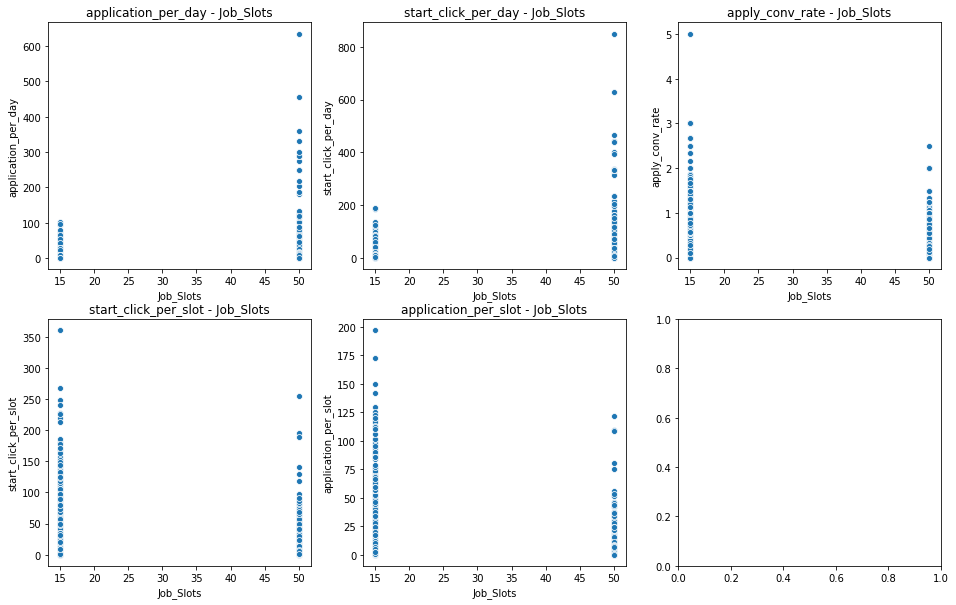

In [70]:
metrics = ['application_per_day', 'start_click_per_day', 'apply_conv_rate', 'start_click_per_slot', 'application_per_slot']
fig, axs = plt.subplots(2, 3, figsize=(16, 10))
for idx, metric in enumerate(metrics):
    ax = plt.subplot(2, 3, idx + 1)
    sns.scatterplot(x=df_metrics['Job_Slots'], y=df_metrics[metric]).set_title("{} - {}".format(metric, 'Job_Slots'))

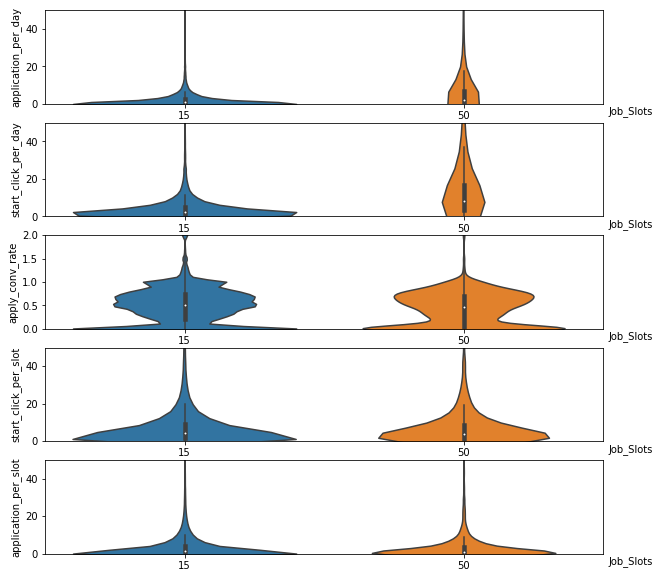

In [111]:
job_slot_values = df_metrics['Job_Slots'].unique()
metrics_count = len(metrics)
fig, axs = plt.subplots(metrics_count, 1, figsize=(10, 10))
for idx, metric in enumerate(metrics):
    ax = plt.subplot(metrics_count, 1, idx + 1)
    sns.violinplot(x='Job_Slots',y=metric, data=df_metrics.replace([np.inf, -np.inf], np.nan).dropna(), split=True)
    plt.ylim(0, 50)
    if metric == 'apply_conv_rate':
        plt.ylim(0, 2)
    ax.set_xlabel('Job_Slots')
    ax.xaxis.set_label_coords(1.05, -0.025)

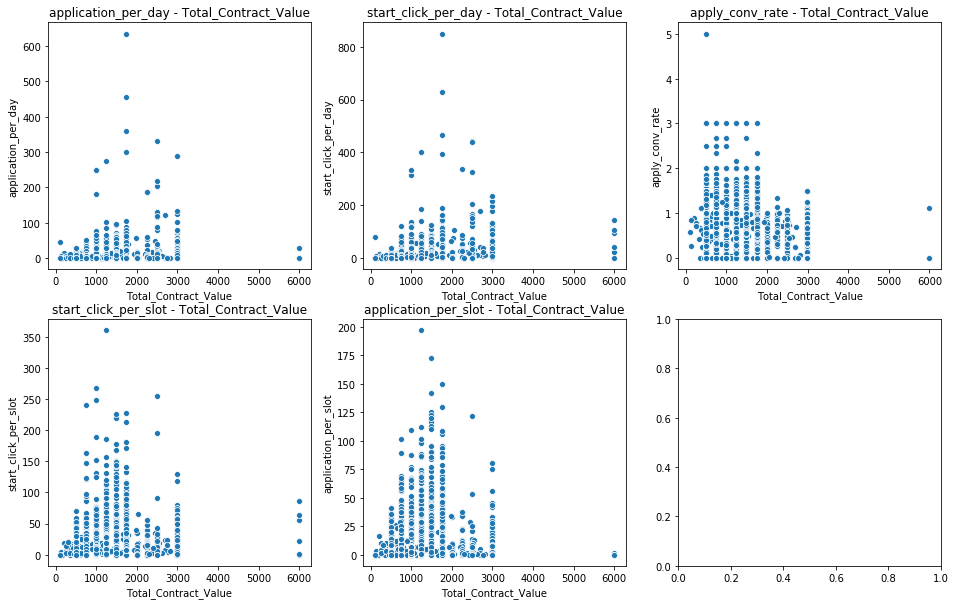

In [124]:
fig, axs = plt.subplots(2, 3, figsize=(16, 10))
for idx, metric in enumerate(metrics):
    ax = plt.subplot(2, 3, idx + 1)
    sns.scatterplot(x=df_metrics['Total_Contract_Value'], y=df_metrics[metric]).set_title("{} - {}".format(metric, 'Total_Contract_Value'))

In [131]:
id_vars = list(set(df_metrics.columns) - set(metrics))
df_violin=df.melt(id_vars=id_vars, var_name='metrics')
df_violin

,Total_Contract_Value,day_diff,Contract_ID,Job_Listings,EndDate,Job_Slots,Apply_Start_Clicks,StartDate,Renewal_Flag,Employer_ID,Click_Market_Value,Applications,City_ID,metrics,value
0,995,31,2423796,25,2017-11-30,15,255,2017-10-30,1,4277920,15484.40,215,9767,application_per_day,6.935484
1,1495,30,2074128,50,2017-07-29,50,70,2017-06-29,0,2372987,1719.30,55,8585,application_per_day,1.833333
2,495,31,1924740,20,2017-06-02,15,95,2017-05-02,0,1142693,1195.75,45,6665,application_per_day,1.451613
3,995,28,1942512,20,2017-06-06,15,175,2017-05-09,0,1353893,1197.35,155,5165,application_per_day,5.535714
4,745,31,1380984,20,2016-10-20,15,185,2016-09-19,1,922427,8889.70,150,3882,application_per_day,4.838710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188780,1245,18,2601276,0,2018-01-11,15,45,2017-12-24,0,5234187,1846.80,5,123,application_per_slot,0.333333
188781,1245,13,2777388,45,2018-03-05,15,140,2018-02-20,0,6707680,3108.40,80,128,application_per_slot,5.333333
188782,1495,4,1128324,0,2016-06-01,15,45,2016-05-28,0,1799067,949.05,35,7344,application_per_slot,2.333333
188783,1245,27,2729376,0,2018-03-03,15,5,2018-02-04,1,2391600,5.00,5,3945,application_per_slot,0.333333


In [130]:
fig, axs = plt.subplots(1, 1, figsize=(16, 10))

sns.violinplot(x='value', y='Total_Contract_Value', data=df_violin, hue='metrics')
plt.ylim(250, 2000)

(250, 2000)

Error in callback <function flush_figures at 0x119c9e310> (for post_execute):


KeyboardInterrupt: 